In [1]:
from perceptron_layer import MLP_layer
from activation_functions import Sigmoid, Softmax, CCELoss
from mulit_layer_perceptron import MLP


In [2]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random

## Load and process MNIST data

In [3]:
# self made functions

def one_hot_digits(targets):
    targets_hot = np.zeros((targets.shape[0],10))
    for t, t_hot in zip(targets, targets_hot):
        t_hot[t] = 1
    return targets_hot

def rescale(array, new_min, new_max):
    minimum, maximum = np.min(array), np.max(array)
    m = (new_max - new_min) / (maximum - minimum)
    b = new_min - m * minimum
    return m * array + b

def shuffle(X, Y_head):
    random_index = random.sample(range(len(X)), len(X))
    X_shuffled = X[random_index,:]
    Y_head_shuffled = Y_head[random_index,:]
    return X_shuffled, Y_head_shuffled

def minibatches(X, Y_head, batch_size):
    num_batches = int(len(X)/batch_size)
    if len(X)%batch_size != 0:
        num_batches = num_batches + 1
    X_minibatches=[]
    Y_head_minibatches=[]
    for i in range(num_batches):
        index = np.array(range(len(X)))
        mask = list(index % num_batches == i)
        X_minibatches.append(np.array(X[mask]))
        Y_head_minibatches.append(np.array(Y_head[mask]))
    return X_minibatches, Y_head_minibatches
    

def display_digit(image, target):
    image= np.reshape(image,(8,8))
    plt.imshow(image, cmap='gray')
    print(target)
    plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


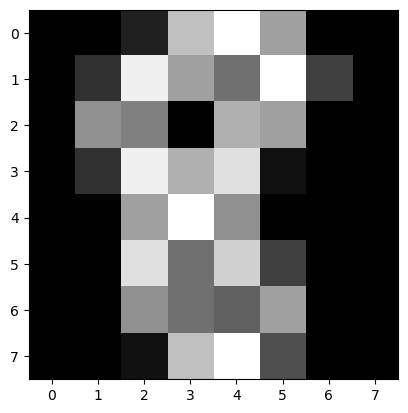

In [4]:
# load and process data
X, Y_head = load_digits(return_X_y=True)
X = rescale(X, 0, 1)
Y_head = one_hot_digits(Y_head)
X, Y_head = shuffle(X,Y_head)
X_batches, Y_head_batches = minibatches(X,Y_head, 10)
display_digit(X_batches[0][0], Y_head_batches[0][0])

## building and training a MLP

In [5]:
# build Perspetron
mlp = MLP(n_layers=4, n_units_per_layer=[100,50,30,10], input_size=64)

# train perceptron (later a function inside MLP)
loss = mlp.training(X_batches, Y_head_batches, epochs=10000, learning_rate=0.01, loss_func=CCELoss())

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [56:15<00:00,  2.96it/s]


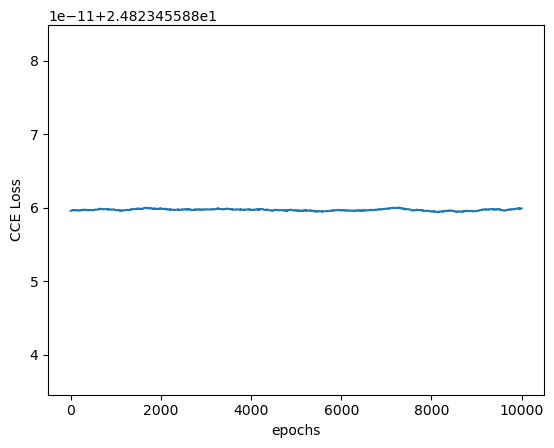

In [6]:
plt.plot(loss)
plt.ylabel("CCE Loss")
plt.xlabel("epochs")
plt.show()

In [8]:
mlp.forward(X_batches[0])

array([[0.06474707, 0.14255693, 0.06146083, 0.16723494, 0.06385474,
        0.03519648, 0.07306537, 0.25947917, 0.08429341, 0.04811107],
       [0.06572469, 0.14043106, 0.06126121, 0.16694548, 0.06369547,
        0.03493881, 0.07466787, 0.25937972, 0.08355635, 0.04939935],
       [0.06511192, 0.14147584, 0.06163171, 0.16690345, 0.06365795,
        0.03483336, 0.07353381, 0.25970933, 0.08460735, 0.04853529],
       [0.06378962, 0.14184516, 0.06199229, 0.16836353, 0.06355162,
        0.03484603, 0.07441304, 0.25980979, 0.08215436, 0.04923456],
       [0.06635   , 0.14267824, 0.06113225, 0.16526325, 0.06516575,
        0.03528383, 0.07409856, 0.2572418 , 0.08342245, 0.04936386],
       [0.06544714, 0.14235772, 0.06183411, 0.16737023, 0.06322984,
        0.03598073, 0.0737029 , 0.25535658, 0.08471727, 0.05000348],
       [0.06543213, 0.14046794, 0.06137093, 0.16551735, 0.06569488,
        0.0349602 , 0.07240215, 0.26170255, 0.08471688, 0.04773498],
       [0.06512746, 0.14050809, 0.0613118